In [1]:
#@unpublished{SARC,
#  authors={Mikhail Khodak and Nikunj Saunshi and Kiran Vodrahalli},
#  title={A Large Self-Annotated Corpus for Sarcasm},
#  url={https://arxiv.org/abs/1704.05579},
#  year=2017
#}
#https://www.kaggle.com/danofer/sarcasm#train-balanced-sarcasm.csv
import os
import string
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/asel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/asel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# df - data frame
df = pd.read_csv('../train-balanced-sarcasm.csv')
# dropping empty comment entries
df.dropna(subset=['comment'], inplace=True)

print('Type:')
print('Labels array ',type(df.label))
print('Comments array ',type(df.comment))
print('one comment line ', type(df.comment[0]))
print('Shape:')
print('Labels array ',df.label.shape)
print('Comments array ',df.comment.shape)
print('Two first entries:')
print (df.label[0], df.comment[0])
print (df.label[1], df.comment[1])

Type:
Labels array  <class 'pandas.core.series.Series'>
Comments array  <class 'pandas.core.series.Series'>
one comment line  <class 'str'>
Shape:
Labels array  (1010773,)
Comments array  (1010773,)
Two first entries:
0 NC and NH.
0 You do know west teams play against west teams more than east teams right?


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
tf_idf_vectorizer = TfidfVectorizer()
# tokenize and build vocab
T = tf_idf_vectorizer.fit(df.comment)
print(len(T.vocabulary_))

167435


In [4]:
# preprocess with nltk
def my_tokenizer(corpus):
    corpus_tokenized = []
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    sbs = nltk.stem.SnowballStemmer('english', ignore_stopwords=False)
    for comment in corpus:
        words = tokenizer.tokenize(comment)
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if not word in stop_words]
        
        cmnt_t = []
        for token in words:
            cmnt_t.append(sbs.stem(token))
            # make a string to be compatible with TfidfVectorizer
            c = ' '.join(cmnt_t)
        # Lemmitize
        #words = [lemmatizer.lemmatize(word) for word in words]
        
        corpus_tokenized.append(c)
    return corpus_tokenized

In [5]:
df2 = pd.Series(my_tokenizer(df.comment))

In [6]:
for i in range(10):
    print(df.comment[i])
    print(df2[i], '\n')

NC and NH.
nc nh 

You do know west teams play against west teams more than east teams right?
you know west team play west team east team right 

They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line has moved to patriots -1
they underdog earlier today sinc gronk announc afternoon vega line move patriot 1 

This meme isn't funny none of the "new york nigga" ones are.
this meme funni none new york nigga one 

I could use one of those tools.
i could use one tool 

I don't pay attention to her, but as long as she's legal I wouldn't kick her out of bed (before she took a load)
i pay attent long legal i kick bed took load 

Trick or treating in general is just weird...
trick treat general weird 

Blade Mastery+Masamune or GTFO!
blade masteri masamun gtfo 

You don't have to, you have a good build, buy games or save it
you good build buy game save 

I would love to see him at lolla.
i would love see lolla 



In [7]:
T = tf_idf_vectorizer.fit(df2)
print(len(T.vocabulary_))

131021


In [8]:
tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,3))
T = tf_idf_vectorizer.fit(df2)
len(T.vocabulary_)

6268559

167435 features from before now reduced to 131022 features, that is about 22%

In [9]:
from sklearn.model_selection import train_test_split
# divide into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df2, df.label, train_size=0.33)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
# Vetorize the training data set
X_train = tf_idf_vectorizer.fit_transform(X_train)
print(X_train.shape)
print(X_train[0:3])

(333555, 2342042)
  (0, 2295377)	0.08403192040579566
  (0, 884033)	0.13565504784920923
  (0, 642503)	0.18483129966185147
  (0, 990024)	0.1619485054723261
  (0, 930743)	0.26084501135689486
  (0, 618452)	0.11365271992434346
  (0, 475620)	0.11315049929769513
  (0, 1669374)	0.09442393824396139
  (0, 2300958)	0.21473026021717992
  (0, 884434)	0.26084501135689486
  (0, 642546)	0.26084501135689486
  (0, 990162)	0.26084501135689486
  (0, 930744)	0.26084501135689486
  (0, 619072)	0.17140456369170137
  (0, 477615)	0.23575544888861052
  (0, 2300963)	0.26084501135689486
  (0, 884435)	0.26084501135689486
  (0, 642547)	0.26084501135689486
  (0, 990163)	0.26084501135689486
  (0, 930745)	0.26084501135689486
  (0, 619127)	0.26084501135689486
  (1, 2295377)	0.264014369817753
  (1, 1282354)	0.5085902430761836
  (1, 2303673)	0.8195318036400072
  (2, 2097702)	0.1690946995003176
  (2, 1899166)	0.18333120537780853
  (2, 1057303)	0.12420892486074264
  (2, 1852652)	0.2111247700340524
  (2, 1377326)	0.188851708

In [11]:
# Vetorize the test data set
X_test = tf_idf_vectorizer.transform(X_test)
print(X_test.shape)
print(X_test[0:3])

(677218, 2342042)
  (0, 2296310)	0.35205279172210907
  (0, 2296286)	0.27627736876649334
  (0, 2295377)	0.1134147516133758
  (0, 1802726)	0.19725488802358238
  (0, 1670773)	0.341092984246088
  (0, 1669374)	0.12744047084228027
  (0, 1349511)	0.33331687709081304
  (0, 1347657)	0.15993758060105553
  (0, 744329)	0.13095213862473232
  (0, 593937)	0.35205279172210907
  (0, 593687)	0.27976998914823636
  (0, 593384)	0.3845654210324432
  (0, 180036)	0.2975895376802706
  (0, 177647)	0.1512633771756192
  (1, 2233143)	0.34124038347017366
  (1, 2232047)	0.1857660176093302
  (1, 1780567)	0.16766011995092808
  (1, 1742468)	0.20480676039123955
  (1, 1741580)	0.16935454128026448
  (1, 1708331)	0.32467493712598416
  (1, 1545915)	0.29074366906421906
  (1, 1115659)	0.10893978479476327
  (1, 1009166)	0.289819561589443
  (1, 1009143)	0.2585562202170115
  (1, 1000062)	0.12475286576368891
  (1, 307216)	0.34124038347017366
  (1, 304023)	0.1598881028246156
  (1, 222808)	0.34752918304163555
  (1, 222798)	0.312222

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# bagging with Logistic Regressoin
# oob Out-Of-Bag
bag_log_reg = BaggingClassifier(
      LogisticRegression(), n_estimators=200,
    max_samples=50000, bootstrap=True, n_jobs=-1, oob_score=True)


#clf = make_pipeline(TfidfVectorizer(ngram_range=(1,3)), bag_log_reg)
bag_log_reg.fit(X_train,y_train)
print('oob_score is ', bag_log_reg.oob_score_)    

#cross_val_score(clf, X_train, y_train, cv=10)

oob_score is  0.6784278454827539


In [23]:
bag_log_reg

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=50000, n_estimators=200, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [24]:
from sklearn.metrics import accuracy_score

bag_log_reg_pred = bag_log_reg.predict(X_test)
accuracy_score(y_test, bag_log_reg_pred)

0.6786824921960137

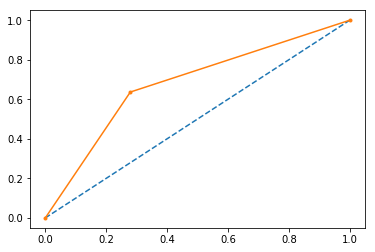

In [25]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, bag_log_reg_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

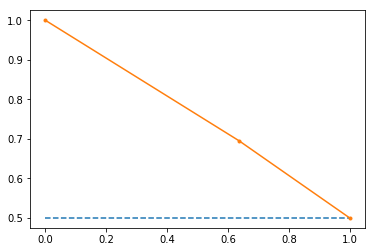

In [28]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, bag_log_reg_pred)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

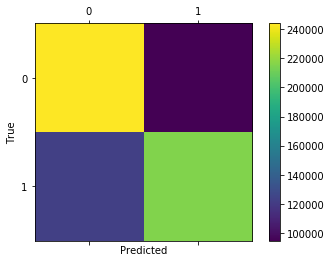

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, bag_log_reg.predict(X_test))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.62')

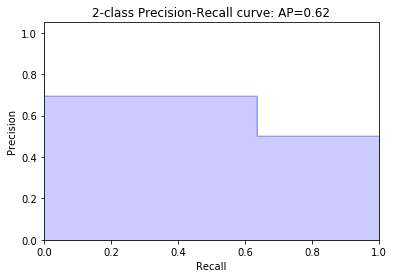

In [40]:
precision, recall, thresholds = precision_recall_curve(y_test, bag_log_reg_pred)
step_kwargs = ({'step': 'post'})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, bag_log_reg_pred)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [45]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Precision bagging logistic: ', precision_score(y_test, bag_log_reg_pred))
print('Recall bagging logistic: ', recall_score(y_test, bag_log_reg_pred))
print('F1 score bagging logistic: ', f1_score(y_test, bag_log_reg_pred))

Precision bagging logistic:  0.6949910381555363
Recall bagging logistic:  0.6367521619961249
F1 score bagging logistic:  0.6645981688708036


In [50]:
from sklearn.ensemble import RandomForestClassifier

rnd_frst = RandomForestClassifier(n_estimators=200, min_samples_leaf=20, random_state=31, n_jobs = -1, oob_score=True)
rnd_frst.fit(X_train, y_train)
print('oob_score is ', rnd_frst.oob_score_)

oob_score is  0.674191662544408


In [53]:
rnd_frst

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=31, verbose=0, warm_start=False)

In [54]:
frst_pred = rnd_frst.predict(X_test)

accuracy_score(y_test, frst_pred)

0.6751740207732222

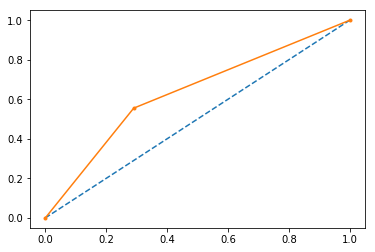

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, frst_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

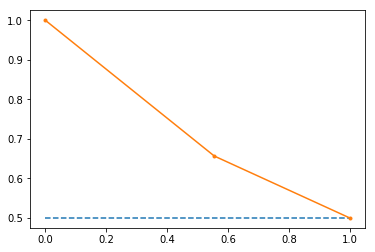

In [27]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, frst_pred)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.59')

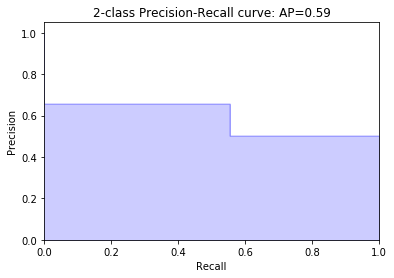

In [41]:
precision, recall, thresholds = precision_recall_curve(y_test, frst_pred)
step_kwargs = ({'step': 'post'})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, frst_pred)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

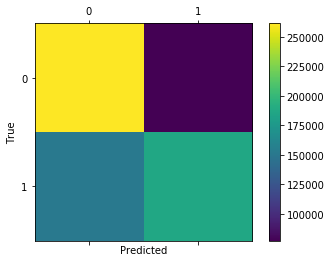

In [21]:
cm = confusion_matrix(y_test, rnd_frst.predict(X_test))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [55]:
print('Precision random forest: ', precision_score(y_test, frst_pred))
print('Recall random forest: ', recall_score(y_test, frst_pred))
print('F1 score random forest: ', f1_score(y_test, frst_pred))

Precision random forest:  0.7080958731049972
Recall random forest:  0.5959636831907755
F1 score random forest:  0.647208821944523


In [56]:
from xgboost import XGBClassifier

eval_set = [(X_train, y_train), (X_test, y_test)]
params = {
    'n_estimators': 1000,
    'booster': 'gbtree',
    'eta': .01,
    'min_child_weight': 6,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7
}

xgb = XGBClassifier(**params)
xgb.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set)

[0]	validation_0-error:0.441334	validation_0-logloss:0.690516	validation_1-error:0.443683	validation_1-logloss:0.688035
[1]	validation_0-error:0.403217	validation_0-logloss:0.682476	validation_1-error:0.407721	validation_1-logloss:0.686971
[2]	validation_0-error:0.396783	validation_0-logloss:0.680276	validation_1-error:0.400518	validation_1-logloss:0.678433
[3]	validation_0-error:0.393629	validation_0-logloss:0.677416	validation_1-error:0.397562	validation_1-logloss:0.675579
[4]	validation_0-error:0.39651	validation_0-logloss:0.672791	validation_1-error:0.398851	validation_1-logloss:0.672321
[5]	validation_0-error:0.392067	validation_0-logloss:0.669742	validation_1-error:0.394994	validation_1-logloss:0.674406
[6]	validation_0-error:0.387064	validation_0-logloss:0.666391	validation_1-error:0.391425	validation_1-logloss:0.671445
[7]	validation_0-error:0.384323	validation_0-logloss:0.66534	validation_1-error:0.388949	validation_1-logloss:0.670383
[8]	validation_0-error:0.383256	validation

[69]	validation_0-error:0.350779	validation_0-logloss:0.62455	validation_1-error:0.361852	validation_1-logloss:0.633251
[70]	validation_0-error:0.350512	validation_0-logloss:0.624296	validation_1-error:0.361634	validation_1-logloss:0.633111
[71]	validation_0-error:0.350047	validation_0-logloss:0.624034	validation_1-error:0.361178	validation_1-logloss:0.63288
[72]	validation_0-error:0.349639	validation_0-logloss:0.623757	validation_1-error:0.360897	validation_1-logloss:0.632624
[73]	validation_0-error:0.349409	validation_0-logloss:0.624276	validation_1-error:0.360822	validation_1-logloss:0.633185
[74]	validation_0-error:0.349019	validation_0-logloss:0.623981	validation_1-error:0.360557	validation_1-logloss:0.632952
[75]	validation_0-error:0.347988	validation_0-logloss:0.623797	validation_1-error:0.359942	validation_1-logloss:0.632797
[76]	validation_0-error:0.347634	validation_0-logloss:0.62342	validation_1-error:0.359471	validation_1-logloss:0.632525
[77]	validation_0-error:0.347364	va

[137]	validation_0-error:0.33253	validation_0-logloss:0.609652	validation_1-error:0.347585	validation_1-logloss:0.624526
[138]	validation_0-error:0.332518	validation_0-logloss:0.609762	validation_1-error:0.34768	validation_1-logloss:0.624563
[139]	validation_0-error:0.332245	validation_0-logloss:0.609567	validation_1-error:0.347576	validation_1-logloss:0.624507
[140]	validation_0-error:0.332098	validation_0-logloss:0.60939	validation_1-error:0.347504	validation_1-logloss:0.624328
[141]	validation_0-error:0.331984	validation_0-logloss:0.609249	validation_1-error:0.347467	validation_1-logloss:0.624222
[142]	validation_0-error:0.331894	validation_0-logloss:0.609105	validation_1-error:0.347449	validation_1-logloss:0.624083
[143]	validation_0-error:0.331681	validation_0-logloss:0.608898	validation_1-error:0.347198	validation_1-logloss:0.623903
[144]	validation_0-error:0.331591	validation_0-logloss:0.608696	validation_1-error:0.346983	validation_1-logloss:0.623712
[145]	validation_0-error:0.

[205]	validation_0-error:0.322337	validation_0-logloss:0.599834	validation_1-error:0.342134	validation_1-logloss:0.615991
[206]	validation_0-error:0.322301	validation_0-logloss:0.599741	validation_1-error:0.342066	validation_1-logloss:0.615954
[207]	validation_0-error:0.322103	validation_0-logloss:0.599594	validation_1-error:0.34197	validation_1-logloss:0.615871
[208]	validation_0-error:0.321878	validation_0-logloss:0.599471	validation_1-error:0.341856	validation_1-logloss:0.615771
[209]	validation_0-error:0.32183	validation_0-logloss:0.599054	validation_1-error:0.341854	validation_1-logloss:0.615595
[210]	validation_0-error:0.321713	validation_0-logloss:0.598929	validation_1-error:0.341792	validation_1-logloss:0.615537
[211]	validation_0-error:0.32159	validation_0-logloss:0.598807	validation_1-error:0.341639	validation_1-logloss:0.615445
[212]	validation_0-error:0.321407	validation_0-logloss:0.598685	validation_1-error:0.341482	validation_1-logloss:0.615322
[213]	validation_0-error:0.

[273]	validation_0-error:0.315327	validation_0-logloss:0.592551	validation_1-error:0.337492	validation_1-logloss:0.613072
[274]	validation_0-error:0.315195	validation_0-logloss:0.592453	validation_1-error:0.337472	validation_1-logloss:0.613035
[275]	validation_0-error:0.31486	validation_0-logloss:0.592333	validation_1-error:0.33733	validation_1-logloss:0.613018
[276]	validation_0-error:0.314806	validation_0-logloss:0.592246	validation_1-error:0.337343	validation_1-logloss:0.613009
[277]	validation_0-error:0.314569	validation_0-logloss:0.592154	validation_1-error:0.337216	validation_1-logloss:0.612981
[278]	validation_0-error:0.314467	validation_0-logloss:0.59204	validation_1-error:0.337234	validation_1-logloss:0.612873
[279]	validation_0-error:0.31447	validation_0-logloss:0.592117	validation_1-error:0.337221	validation_1-logloss:0.612881
[280]	validation_0-error:0.31441	validation_0-logloss:0.591958	validation_1-error:0.337153	validation_1-logloss:0.612768
[281]	validation_0-error:0.31

[341]	validation_0-error:0.309322	validation_0-logloss:0.586358	validation_1-error:0.334183	validation_1-logloss:0.609654
[342]	validation_0-error:0.309298	validation_0-logloss:0.586262	validation_1-error:0.334098	validation_1-logloss:0.609593
[343]	validation_0-error:0.309271	validation_0-logloss:0.586167	validation_1-error:0.334084	validation_1-logloss:0.609544
[344]	validation_0-error:0.309223	validation_0-logloss:0.586083	validation_1-error:0.33411	validation_1-logloss:0.609529
[345]	validation_0-error:0.30916	validation_0-logloss:0.585909	validation_1-error:0.33403	validation_1-logloss:0.609425
[346]	validation_0-error:0.309103	validation_0-logloss:0.585838	validation_1-error:0.334058	validation_1-logloss:0.609408
[347]	validation_0-error:0.30907	validation_0-logloss:0.585755	validation_1-error:0.333994	validation_1-logloss:0.609387
[348]	validation_0-error:0.308981	validation_0-logloss:0.58568	validation_1-error:0.333975	validation_1-logloss:0.609323
[349]	validation_0-error:0.30

[409]	validation_0-error:0.304522	validation_0-logloss:0.581392	validation_1-error:0.331855	validation_1-logloss:0.606475
[410]	validation_0-error:0.304507	validation_0-logloss:0.581362	validation_1-error:0.331778	validation_1-logloss:0.606425
[411]	validation_0-error:0.304445	validation_0-logloss:0.5813	validation_1-error:0.33174	validation_1-logloss:0.606389
[412]	validation_0-error:0.304397	validation_0-logloss:0.581244	validation_1-error:0.331806	validation_1-logloss:0.606405
[413]	validation_0-error:0.304343	validation_0-logloss:0.581167	validation_1-error:0.3318	validation_1-logloss:0.606372
[414]	validation_0-error:0.304262	validation_0-logloss:0.581104	validation_1-error:0.331735	validation_1-logloss:0.606326
[415]	validation_0-error:0.304217	validation_0-logloss:0.581022	validation_1-error:0.331772	validation_1-logloss:0.60632
[416]	validation_0-error:0.30416	validation_0-logloss:0.580949	validation_1-error:0.331704	validation_1-logloss:0.606288
[417]	validation_0-error:0.3041

[477]	validation_0-error:0.300895	validation_0-logloss:0.57675	validation_1-error:0.330501	validation_1-logloss:0.604836
[478]	validation_0-error:0.300844	validation_0-logloss:0.576701	validation_1-error:0.330527	validation_1-logloss:0.604829
[479]	validation_0-error:0.300847	validation_0-logloss:0.576637	validation_1-error:0.330515	validation_1-logloss:0.604816
[480]	validation_0-error:0.300799	validation_0-logloss:0.576558	validation_1-error:0.330446	validation_1-logloss:0.604787
[481]	validation_0-error:0.300814	validation_0-logloss:0.576508	validation_1-error:0.330411	validation_1-logloss:0.604755
[482]	validation_0-error:0.300718	validation_0-logloss:0.576558	validation_1-error:0.330428	validation_1-logloss:0.604791
[483]	validation_0-error:0.300598	validation_0-logloss:0.576511	validation_1-error:0.330409	validation_1-logloss:0.604781
[484]	validation_0-error:0.300556	validation_0-logloss:0.576453	validation_1-error:0.330347	validation_1-logloss:0.604738
[485]	validation_0-error:

[545]	validation_0-error:0.297402	validation_0-logloss:0.573087	validation_1-error:0.329065	validation_1-logloss:0.603765
[546]	validation_0-error:0.297309	validation_0-logloss:0.57303	validation_1-error:0.329018	validation_1-logloss:0.603743
[547]	validation_0-error:0.297279	validation_0-logloss:0.572981	validation_1-error:0.328995	validation_1-logloss:0.603709
[548]	validation_0-error:0.297219	validation_0-logloss:0.572926	validation_1-error:0.329008	validation_1-logloss:0.603688
[549]	validation_0-error:0.297156	validation_0-logloss:0.572875	validation_1-error:0.329002	validation_1-logloss:0.603685
[550]	validation_0-error:0.297054	validation_0-logloss:0.572824	validation_1-error:0.328941	validation_1-logloss:0.603675
[551]	validation_0-error:0.296974	validation_0-logloss:0.572748	validation_1-error:0.328899	validation_1-logloss:0.603671
[552]	validation_0-error:0.296935	validation_0-logloss:0.572702	validation_1-error:0.328925	validation_1-logloss:0.603645
[553]	validation_0-error:

[613]	validation_0-error:0.294191	validation_0-logloss:0.569424	validation_1-error:0.328236	validation_1-logloss:0.602562
[614]	validation_0-error:0.294155	validation_0-logloss:0.569382	validation_1-error:0.328206	validation_1-logloss:0.602538
[615]	validation_0-error:0.294185	validation_0-logloss:0.569339	validation_1-error:0.328171	validation_1-logloss:0.602508
[616]	validation_0-error:0.29411	validation_0-logloss:0.569291	validation_1-error:0.328145	validation_1-logloss:0.602484
[617]	validation_0-error:0.294041	validation_0-logloss:0.569234	validation_1-error:0.328116	validation_1-logloss:0.602462
[618]	validation_0-error:0.293985	validation_0-logloss:0.569188	validation_1-error:0.328076	validation_1-logloss:0.60244
[619]	validation_0-error:0.293967	validation_0-logloss:0.569139	validation_1-error:0.328055	validation_1-logloss:0.602416
[620]	validation_0-error:0.293913	validation_0-logloss:0.569091	validation_1-error:0.328039	validation_1-logloss:0.602402
[621]	validation_0-error:0

[681]	validation_0-error:0.291535	validation_0-logloss:0.56633	validation_1-error:0.327286	validation_1-logloss:0.601341
[682]	validation_0-error:0.291499	validation_0-logloss:0.56628	validation_1-error:0.327286	validation_1-logloss:0.60135
[683]	validation_0-error:0.29143	validation_0-logloss:0.566238	validation_1-error:0.327293	validation_1-logloss:0.601331
[684]	validation_0-error:0.291439	validation_0-logloss:0.5662	validation_1-error:0.327254	validation_1-logloss:0.60132
[685]	validation_0-error:0.291424	validation_0-logloss:0.566156	validation_1-error:0.327276	validation_1-logloss:0.601317
[686]	validation_0-error:0.291364	validation_0-logloss:0.566115	validation_1-error:0.327208	validation_1-logloss:0.601307
[687]	validation_0-error:0.291325	validation_0-logloss:0.566085	validation_1-error:0.327199	validation_1-logloss:0.601286
[688]	validation_0-error:0.291286	validation_0-logloss:0.56603	validation_1-error:0.327166	validation_1-logloss:0.601268
[689]	validation_0-error:0.29127

[749]	validation_0-error:0.288924	validation_0-logloss:0.563428	validation_1-error:0.326722	validation_1-logloss:0.601008
[750]	validation_0-error:0.288924	validation_0-logloss:0.563394	validation_1-error:0.326697	validation_1-logloss:0.600992
[751]	validation_0-error:0.288885	validation_0-logloss:0.563361	validation_1-error:0.326678	validation_1-logloss:0.600973
[752]	validation_0-error:0.288801	validation_0-logloss:0.563281	validation_1-error:0.326675	validation_1-logloss:0.600959
[753]	validation_0-error:0.288816	validation_0-logloss:0.563239	validation_1-error:0.326638	validation_1-logloss:0.600935
[754]	validation_0-error:0.288774	validation_0-logloss:0.563222	validation_1-error:0.326589	validation_1-logloss:0.600899
[755]	validation_0-error:0.288783	validation_0-logloss:0.563189	validation_1-error:0.326574	validation_1-logloss:0.600898
[756]	validation_0-error:0.288726	validation_0-logloss:0.563103	validation_1-error:0.326571	validation_1-logloss:0.600859
[757]	validation_0-error

[817]	validation_0-error:0.28705	validation_0-logloss:0.561016	validation_1-error:0.326059	validation_1-logloss:0.599624
[818]	validation_0-error:0.286936	validation_0-logloss:0.560967	validation_1-error:0.326021	validation_1-logloss:0.599617
[819]	validation_0-error:0.286927	validation_0-logloss:0.560965	validation_1-error:0.32599	validation_1-logloss:0.599621
[820]	validation_0-error:0.286858	validation_0-logloss:0.560924	validation_1-error:0.326024	validation_1-logloss:0.59965
[821]	validation_0-error:0.28678	validation_0-logloss:0.560891	validation_1-error:0.325978	validation_1-logloss:0.599653
[822]	validation_0-error:0.286786	validation_0-logloss:0.560863	validation_1-error:0.325963	validation_1-logloss:0.599638
[823]	validation_0-error:0.286717	validation_0-logloss:0.56083	validation_1-error:0.325926	validation_1-logloss:0.599631
[824]	validation_0-error:0.286657	validation_0-logloss:0.5608	validation_1-error:0.325863	validation_1-logloss:0.599608
[825]	validation_0-error:0.2866

[885]	validation_0-error:0.284865	validation_0-logloss:0.558756	validation_1-error:0.325772	validation_1-logloss:0.599463
[886]	validation_0-error:0.284871	validation_0-logloss:0.558737	validation_1-error:0.325722	validation_1-logloss:0.599451
[887]	validation_0-error:0.284814	validation_0-logloss:0.558696	validation_1-error:0.325708	validation_1-logloss:0.599432
[888]	validation_0-error:0.284769	validation_0-logloss:0.558655	validation_1-error:0.32573	validation_1-logloss:0.599414
[889]	validation_0-error:0.284718	validation_0-logloss:0.558626	validation_1-error:0.325721	validation_1-logloss:0.599415
[890]	validation_0-error:0.28473	validation_0-logloss:0.558617	validation_1-error:0.325728	validation_1-logloss:0.59942
[891]	validation_0-error:0.284709	validation_0-logloss:0.558568	validation_1-error:0.325719	validation_1-logloss:0.599392
[892]	validation_0-error:0.284706	validation_0-logloss:0.558554	validation_1-error:0.325697	validation_1-logloss:0.599402
[893]	validation_0-error:0.

[953]	validation_0-error:0.283186	validation_0-logloss:0.556419	validation_1-error:0.325257	validation_1-logloss:0.599052
[954]	validation_0-error:0.283204	validation_0-logloss:0.556383	validation_1-error:0.325231	validation_1-logloss:0.599027
[955]	validation_0-error:0.28315	validation_0-logloss:0.556349	validation_1-error:0.325185	validation_1-logloss:0.599036
[956]	validation_0-error:0.283108	validation_0-logloss:0.556298	validation_1-error:0.325208	validation_1-logloss:0.599028
[957]	validation_0-error:0.283075	validation_0-logloss:0.556261	validation_1-error:0.32521	validation_1-logloss:0.599025
[958]	validation_0-error:0.282997	validation_0-logloss:0.55623	validation_1-error:0.325235	validation_1-logloss:0.599044
[959]	validation_0-error:0.28294	validation_0-logloss:0.556208	validation_1-error:0.325244	validation_1-logloss:0.599048
[960]	validation_0-error:0.282943	validation_0-logloss:0.556167	validation_1-error:0.325241	validation_1-logloss:0.599055
[961]	validation_0-error:0.2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, eta=0.01, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=6, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.7)

In [57]:
xgb_pred = xgb.predict(X_test)
accuracy_score(y_test, xgb_pred)

0.6747974802796145

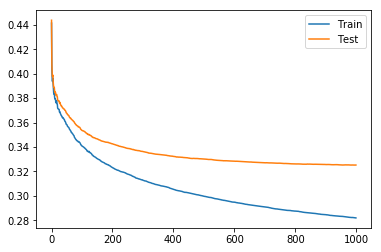

In [58]:
import matplotlib.pyplot as plt

results = xgb.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.62')

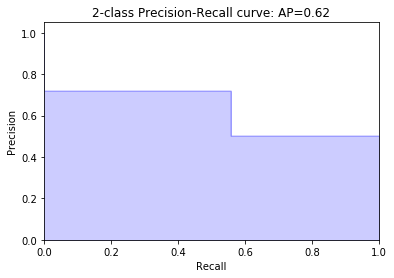

In [49]:
precision, recall, thresholds = precision_recall_curve(y_test, xgb_pred)
step_kwargs = ({'step': 'post'})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, xgb_pred)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

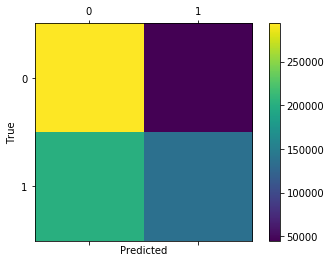

In [22]:
cm = confusion_matrix(y_test, xgb.predict(X_test))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [59]:
print('Precision xgb: ', precision_score(y_test, xgb_pred))
print('Recall xgb: ', recall_score(y_test, xgb_pred))
print('F1 score xgb: ', f1_score(y_test, xgb_pred))

Precision xgb:  0.7065748269277093
Recall xgb:  0.5977742072680875
F1 score xgb:  0.6476367842794676


In [29]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier

#from sklearn import svm
#from sklearn.ensemble import BaggingClassifier

# bagging with SVM
# oob Out-Of-Bag
bag_log_reg_svm = BaggingClassifier(
     LinearSVC(), n_estimators=200,
    max_samples=50000, bootstrap=True, n_jobs=-1, oob_score=True)

bag_log_reg_svm.fit(X_train,y_train)
print('oob_score is ', bag_log_reg_svm.oob_score_)

oob_score is  0.9815292830267872


In [30]:
bag_reg_svm_pred = bag_log_reg_svm.predict(X_test)
accuracy_score(y_test, bag_reg_svm_pred)

0.6793646949726676

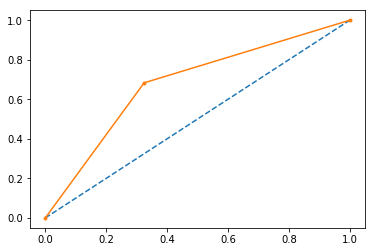

In [33]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, bag_reg_svm_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

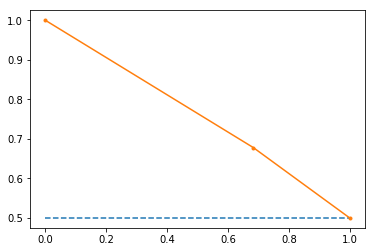

In [34]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, bag_reg_svm_pred)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.62')

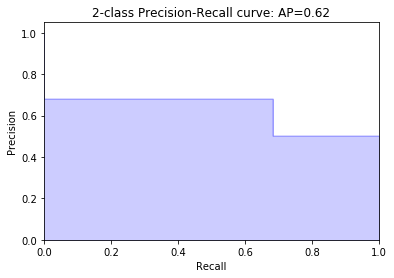

In [39]:
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, bag_reg_svm_pred)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

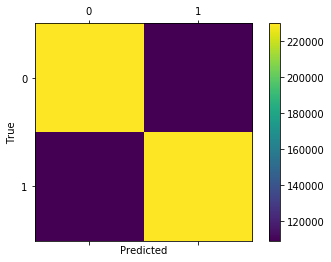

In [25]:
cm = confusion_matrix(y_test, bag_log_reg_svm.predict(X_test))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [48]:
print('Precision bagging svm: ', precision_score(y_test, bag_reg_svm_pred))
print('Recall bagging svm: ', recall_score(y_test, bag_reg_svm_pred))
print('F1 score bagging svm: ', f1_score(y_test, bag_reg_svm_pred))

Precision bagging svm:  0.6778406528068233
Recall bagging svm:  0.6835304333443599
F1 score bagging svm:  0.6806736530028206
